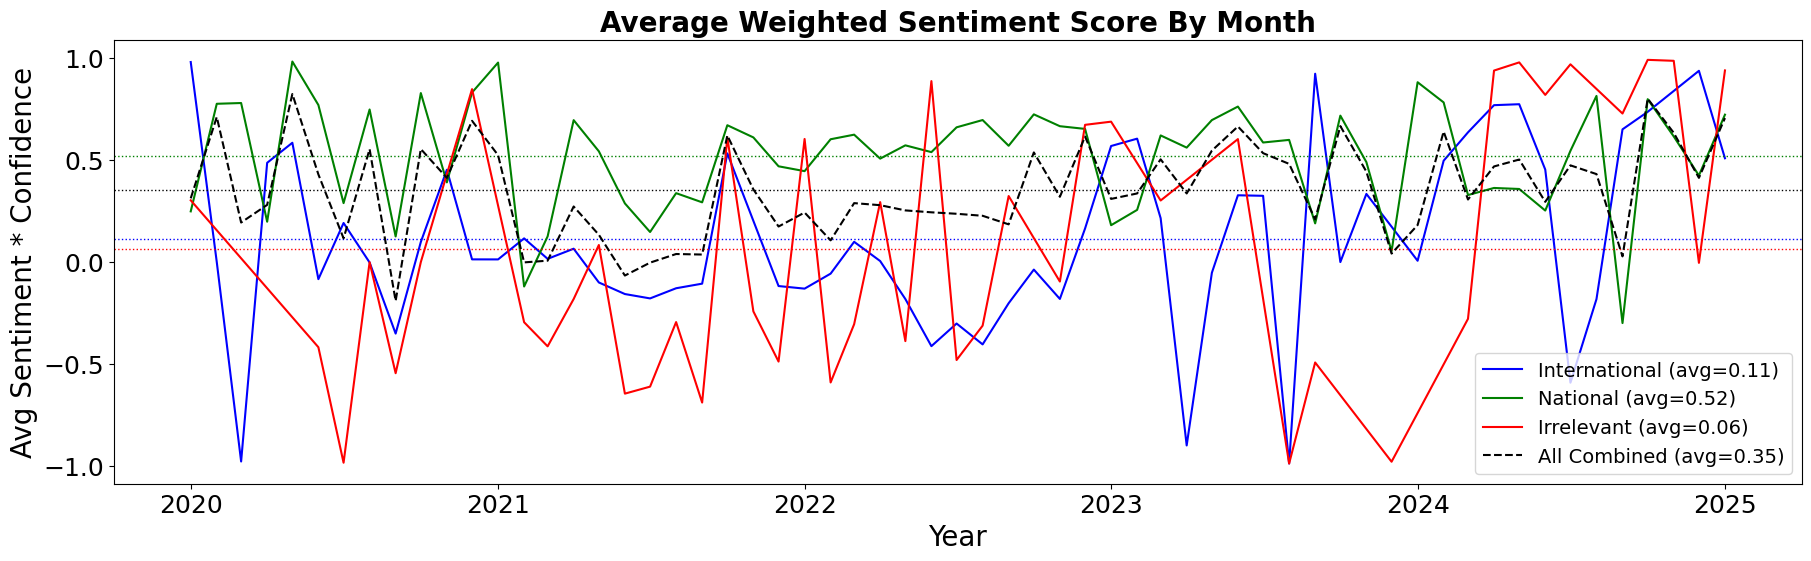

Average Sentiment (Jan 2020 – Jan 2025):
  International: 0.1107
  National: 0.5173
  Irrelevant: 0.0635
  All Combined: 0.3519


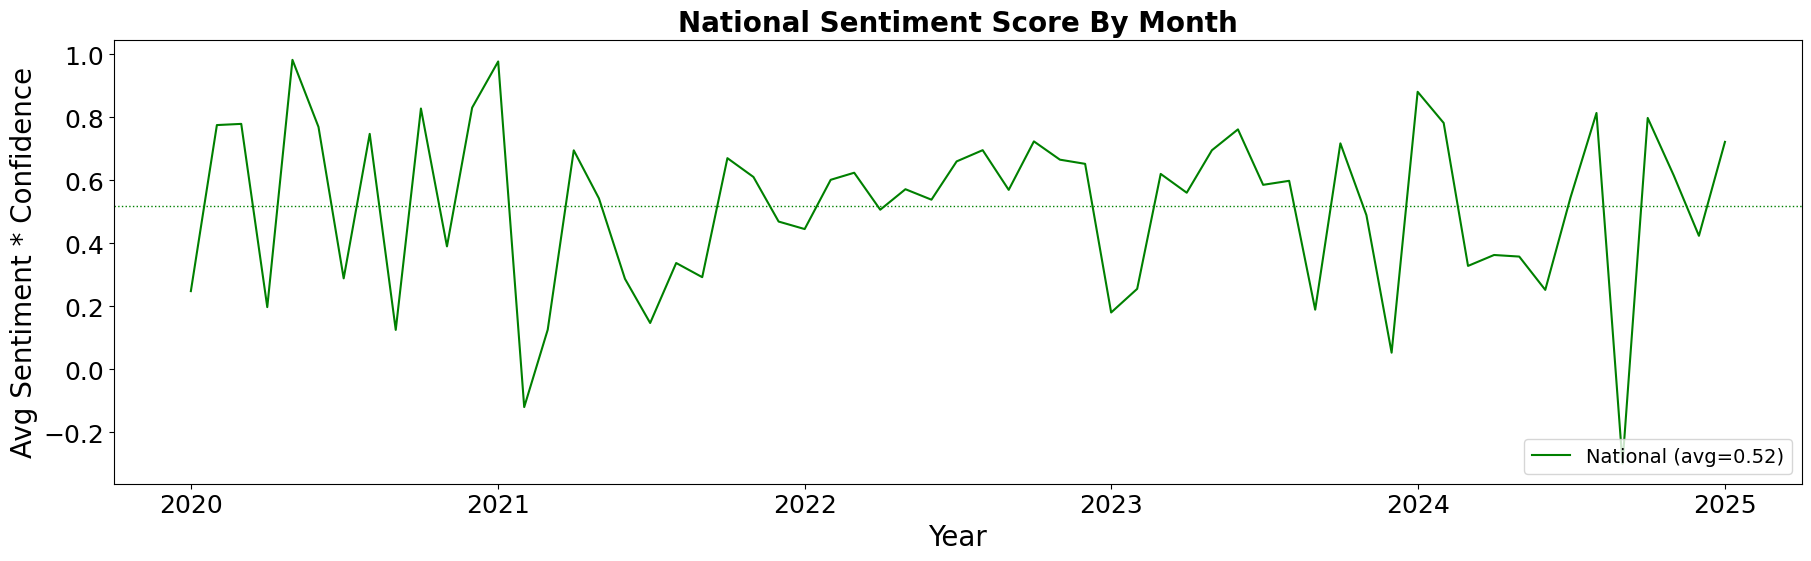

Average Sentiment (Jan 2020 – Jan 2025):
  National: 0.5173


In [ ]:
#THE CODE BELOW GENERATES FIGURE 4, CORRESPSONDING TO AVERAGE SENTIMENT SCORES BY MONTH
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load and preprocess data
df = pd.read_csv("Mr4_comprehensive.csv")
df["vn_sent"] = df["vn_sent"].replace({
    "Tiêu cực": "bearish", "Tích cực": "bullish", "Trung tính": "neutral"
})
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Trim to Jan 2020 – Jan 2025
df = df[(df['date'] >= "2020-01-01") & (df['date'] <= "2025-01-31")]

# Convert to month period, then back to timestamp (month start) for plotting
df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()

# Compute sentiment score
sentiment_map = {'bullish': 1, 'neutral': 0, 'bearish': -1}
df['sentiment_score'] = df['vn_sent'].map(sentiment_map) * df['vn_score']
df.dropna(subset=['month', 'sentiment_score'], inplace=True)

# Plotting function
def plot_sentiment(data, title, categories, colors):
    fig, ax = plt.subplots(figsize=(18, 5.5), constrained_layout=True)
    avg_dict = {}

    for cat, color in zip(categories, colors):
        if cat == 'All Combined':
            monthly_avg = data.groupby('month')['sentiment_score'].mean()
            ax.plot(monthly_avg.index, monthly_avg.values, label=cat, color='black', linestyle='--')
            avg_val = monthly_avg.mean()
            avg_dict[cat] = avg_val
            ax.axhline(y=avg_val, color='black', linestyle=':', linewidth=1)
        else:
            group = data[data['category'] == cat]
            monthly_avg = group.groupby('month')['sentiment_score'].mean()
            ax.plot(monthly_avg.index, monthly_avg.values, label=cat, color=color)
            avg_val = monthly_avg.mean()
            avg_dict[cat] = avg_val
            ax.axhline(y=avg_val, color=color, linestyle=':', linewidth=1)

    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    ax.set_title(title, fontsize=20, fontweight='bold')
    ax.set_xlabel('Year', fontsize=20)
    ax.set_ylabel('Avg Sentiment * Confidence', fontsize=20)

    # Custom legend with averages
    handles, labels = ax.get_legend_handles_labels()
    new_labels = [f"{lbl} (avg={avg_dict[lbl]:.2f})" for lbl in labels]
    ax.legend(handles, new_labels, fontsize=14, loc="lower right", frameon=True)

    ax.tick_params(axis='both', labelsize=18)
    ax.grid(False)

    plt.show()

    # Print averages for full period
    print("Average Sentiment (Jan 2020 – Jan 2025):")
    for cat, val in avg_dict.items():
        print(f"  {cat}: {val:.4f}")

# Run plot
plot_sentiment(df, 'Average Weighted Sentiment Score By Month',
               ['International', 'National', 'Irrelevant', 'All Combined'],
               ['blue', 'green', 'red', None])
plot_sentiment(df, 'National Sentiment Score By Month',
               ['National'],
               ['green', None])


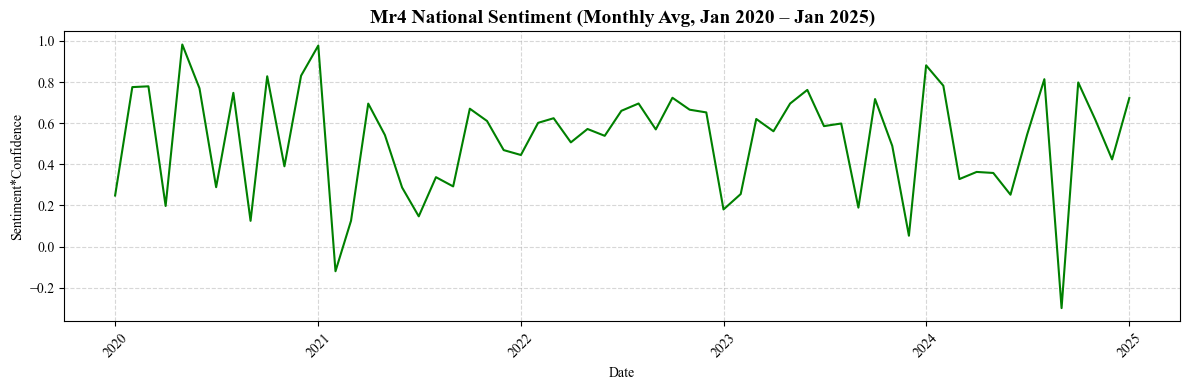

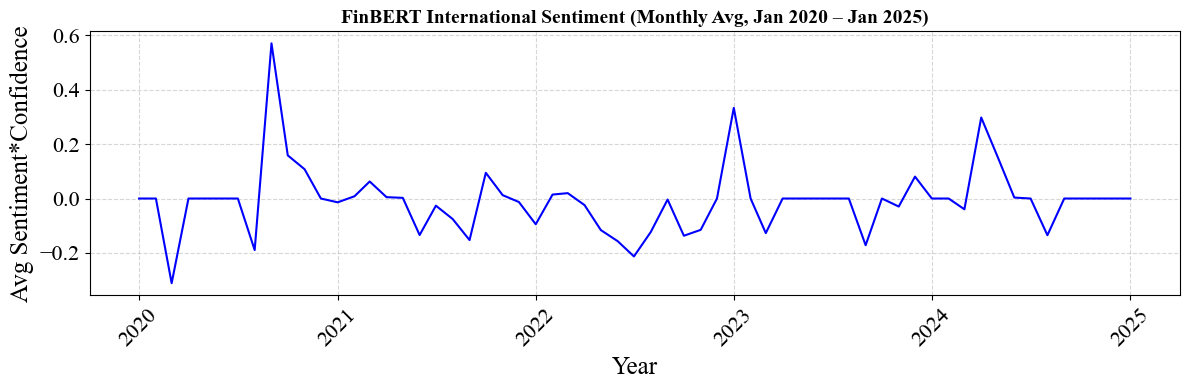

In [ ]:
# THE CODE BELOW GENERATES A VISUAL OF:
# 1) Mr4 National Sentiment (Monthly Avg, Jan 2020 – Jan 2025)
# 2) FinBERT International Sentiment (Monthly Avg, Jan 2020 – Jan 2025) 
# In the paper, we only include (2) as the Figure 5. (1) is actually embedded in Figure 4. 
import pandas as pd
import matplotlib.pyplot as plt

# --- Common settings ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

start_date = pd.to_datetime("2020-01-01")
end_date   = pd.to_datetime("2025-01-31")

# --- Mr4 National (Vietnamese Sentiment) ---
mr4 = pd.read_csv("Sentiment_indicator/Mr4_national.csv")
mr4['date'] = pd.to_datetime(mr4['date'], errors='coerce')

# map labels
mr4["vn_sent"] = mr4["vn_sent"].replace({
    "Tiêu cực": "bearish", 
    "Tích cực": "bullish", 
    "Trung tính": "neutral"
})
sent_map = {"bullish": 1, "neutral": 0, "bearish": -1}
mr4['sentiment_score'] = mr4['vn_sent'].map(sent_map) * mr4['vn_score']

# monthly average (month-start)
mr4['month'] = mr4['date'].dt.to_period('M').dt.to_timestamp()
mr4_monthly = mr4.groupby('month')['sentiment_score'].mean().loc[start_date:end_date]

plt.figure(figsize=(12,4))
plt.plot(mr4_monthly.index, mr4_monthly.values, color="green", linewidth=1.5)
plt.title("Mr4 National Sentiment (Monthly Avg, Jan 2020 – Jan 2025)", fontsize=14, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Sentiment*Confidence")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# --- FinBERT International (English Sentiment) ---
fin = pd.read_csv("Sentiment_indicator/Finbert_international.csv")
fin['date'] = pd.to_datetime(fin['date'], errors='coerce')

# map labels
fin["en_sent"] = fin["en_sent"].replace({
    "positive": "bullish", 
    "neutral": "neutral", 
    "negative": "bearish"
})
fin_sent_map = {"bullish": 1, "neutral": 0, "bearish": -1}
fin['sentiment_score'] = fin['en_sent'].map(fin_sent_map) * fin['en_score']

# monthly average (month-start)
fin['month'] = fin['date'].dt.to_period('M').dt.to_timestamp()
fin_monthly = fin.groupby('month')['sentiment_score'].mean().loc[start_date:end_date]

plt.figure(figsize=(12,4))
plt.plot(fin_monthly.index, fin_monthly.values, color="blue", linewidth=1.5)
plt.title("FinBERT International Sentiment (Monthly Avg, Jan 2020 – Jan 2025)", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Avg Sentiment*Confidence", fontsize = 18)
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


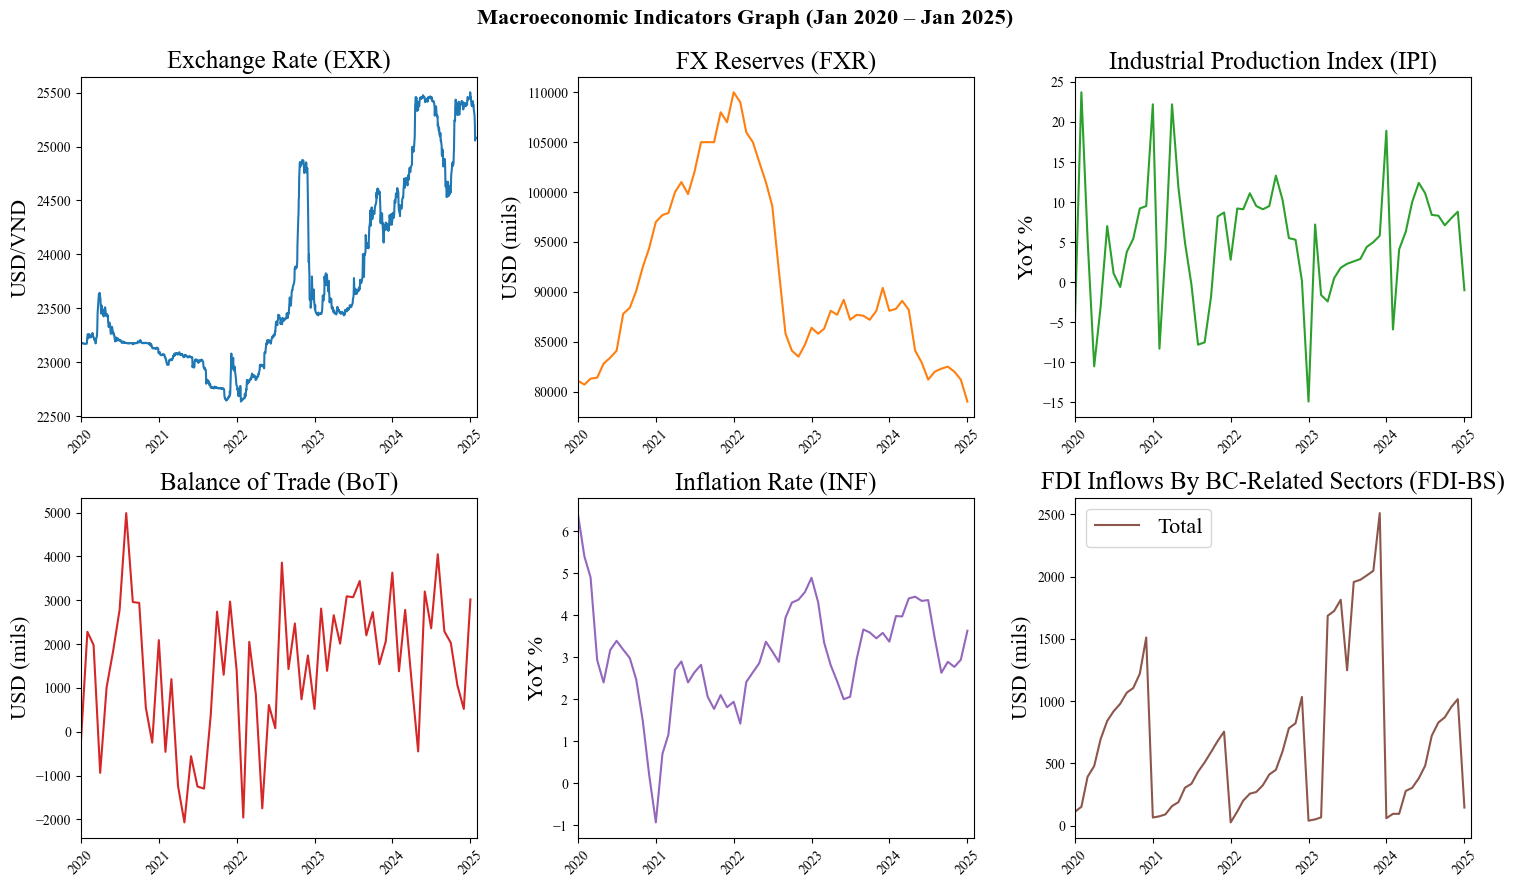

In [1]:
# THE CODE BELOW GENERATES THE VISUALIZATION OF MACROECONOMIC INDICATORS GRAPH (JAN2020–JAN2025), OR FIGURE 6 IN THE PAPER
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

base_dir = 'Macroeconomic_Indicator'
csv_configs = [
    {
        'title': 'Exchange Rate (EXR)',
        'filename': 'exchange_rate.csv',
        'cols': ['USD/VND'],
        'ylabel': 'USD/VND'
    },
    {
        'title': 'FX Reserves (FXR)',
        'filename': 'fx_reserves.csv',
        'cols': ['USD (millions)'],
        'ylabel': 'USD (mils)'
    },
    {
        'title': 'Industrial Production Index (IPI)',
        'filename': 'IPI.csv',
        'cols': ['IP YoY (%)'],
        'ylabel': 'YoY %'
    },
    {
        'title': 'Balance of Trade (BoT)',
        'filename': 'trade_balance.csv',
        'cols': ['Trade_Balance (USD)'],
        'ylabel': 'USD (mils)'
    },
    {
        'title': 'Inflation Rate (INF)',
        'filename': 'inflation_rate.csv',
        'cols': ['Inf_YoY (%)'],
        'ylabel': 'YoY %'
    },
    {
        'title': 'FDI Inflows By BC-Related Sectors (FDI-BS)',
        'filename': 'FDI-BS.csv',
        'relevant_sectors': [
            "Professional, scientific and technical activities",
            "Information and communication",
            "Financial, banking and insurance activities"
        ],
        'ylabel': 'USD (mils)'
    }
]

subplot_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

# Date range
start_date = pd.to_datetime("2020-01-01")
end_date   = pd.to_datetime("2025-01-31")

def plot_subplot(ax, cfg, color):
    path = os.path.join(base_dir, cfg['filename'])
    if 'relevant_sectors' not in cfg:
        df = pd.read_csv(path, parse_dates=['Date'])
        df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
        for col in cfg['cols']:
            ax.plot(df['Date'], df[col], color=color, linewidth=1.5)
    else:
        fdi = pd.read_csv(path, parse_dates=['Date'])
        fdi = fdi[(fdi['Date'] >= start_date) & (fdi['Date'] <= end_date)]
        fdi = fdi[fdi['sector'].isin(cfg['relevant_sectors'])].copy()
        fdi['contrib_cap'] = pd.to_numeric(fdi['contrib_cap'], errors='coerce')

        # Aggregate total across the 3 blockchain-related sectors
        total_fdi = (
            fdi.groupby('Date')['contrib_cap']
            .sum()
            .sort_index()
        )

        ax.plot(total_fdi.index, total_fdi.values, color=color, linewidth=1.5, label="Total")
        ax.legend(fontsize=16)

    ax.set_title(cfg['title'], fontsize=18)
    ax.set_xlabel('')
    ax.set_ylabel(cfg['ylabel'], fontsize = 16)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlim([start_date, end_date])

fig, axes = plt.subplots(2, 3, figsize=(15, 9))

for i, ax in enumerate(axes.flat):
    plot_subplot(ax, csv_configs[i], subplot_colors[i])

fig.suptitle("Macroeconomic Indicators Graph (Jan 2020 – Jan 2025)", fontsize=16, fontweight='bold')

fig.tight_layout(rect=[0, 0, 1, 0.99]) 
plt.show()
